# Jan Zubalewicz & Mateusz Kubita

In [78]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from colabtools import drive

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from IPython.display import display

In [79]:
raw = drive.LoadFile(file_id='1xTbmWoYPHHWVRYeXOh5MCY7eZhjLdu8Z')
b = io.BytesIO(raw)
df = pd.read_csv(b)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


This dataset is designed to analyze the impact of complex scheduling algorithms on injury rates and athletic performance in a collegiate sports environment. It provides synthetic but realistic data for athletes, capturing their demographics, training regimes, schedules, fatigue levels, and injury risks.

Features Overview

Athlete Information
 - Athlete_ID: Unique identifier for each athlete (e.g., A001, A002).
 - Age: Athlete's age (18–25 years).
 - Gender: Gender of the athlete (Male/Female).
 - Height_cm: Height of the athlete in centimeters (160–200 cm).
 - Weight_kg: Weight of the athlete in kilograms (55–100 kg).
 - Position: Playing position in the team (Guard, Forward, Center).
Training Information
 - Training_Intensity: Average intensity of training sessions on a scale of 1 (low) to 10 (high).
 - Training_Hours_Per_Week: Total hours of training per week (5–20 hours).
 - Recovery_Days_Per_Week: Number of days dedicated to recovery per week (1–3 days).
Schedule Information
 - Match_Count_Per_Week: Number of matches scheduled per week (1–4 matches).
 - Rest_Between_Events_Days: Average rest days between matches (1–3 days).
Derived Features
 - Load_Balance_Score: A calculated score (0–100) indicating the balance between training load and recovery. A higher score reflects a better balance.
 - ACL_Risk_Score: Predicted risk score (0–100) for ACL injuries. A higher score indicates a greater risk of injury.
Injury Information
 - Injury_Indicator: Target column indicating whether the athlete sustained an ACL injury (1 = Yes, 0 = No).
Performance Metrics
 - Fatigue_Score: Subjective fatigue level on a scale of 1 (low) to 10 (high).
 - Performance_Score: Composite performance score (50–100) based on metrics like points scored and assists.
 - Team_Contribution_Score: Athlete’s overall contribution to the team’s success on a scale of 50–100.

In [81]:
df = df.drop(['Athlete_ID'], axis=1)

### Column Explanations:

*   `athlete_id`: A unique identifier for each athlete. This column is an integer and serves to distinguish individual athletes within the dataset.

*   `age`: The age of the athlete in years. This is an integer, typically ranging from 18 to 35, representing the athlete's current age. Age can influence training capacity, recovery, and peak performance.

...

## Perform Basic EDA


In [82]:
print("### Basic Descriptive Statistics:\n")
print(df.describe())

print("\n### Missing Values per Column:\n")
print(df.isnull().sum())

print("\n### DataFrame Info (Data Types and Non-Null Counts):\n")
df.info()

### Basic Descriptive Statistics:

              Age   Height_cm  ...  ACL_Risk_Score  Injury_Indicator
count  200.000000  200.000000  ...      200.000000        200.000000
mean    21.170000  180.805000  ...       46.470000          0.070000
std      2.002787   11.529598  ...       18.943956          0.255787
min     18.000000  160.000000  ...        2.000000          0.000000
25%     19.000000  171.000000  ...       33.000000          0.000000
50%     21.000000  182.500000  ...       45.000000          0.000000
75%     23.000000  191.000000  ...       60.000000          0.000000
max     24.000000  199.000000  ...      100.000000          1.000000

[8 rows x 14 columns]

### Missing Values per Column:

Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Event

In [83]:
df.head()

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


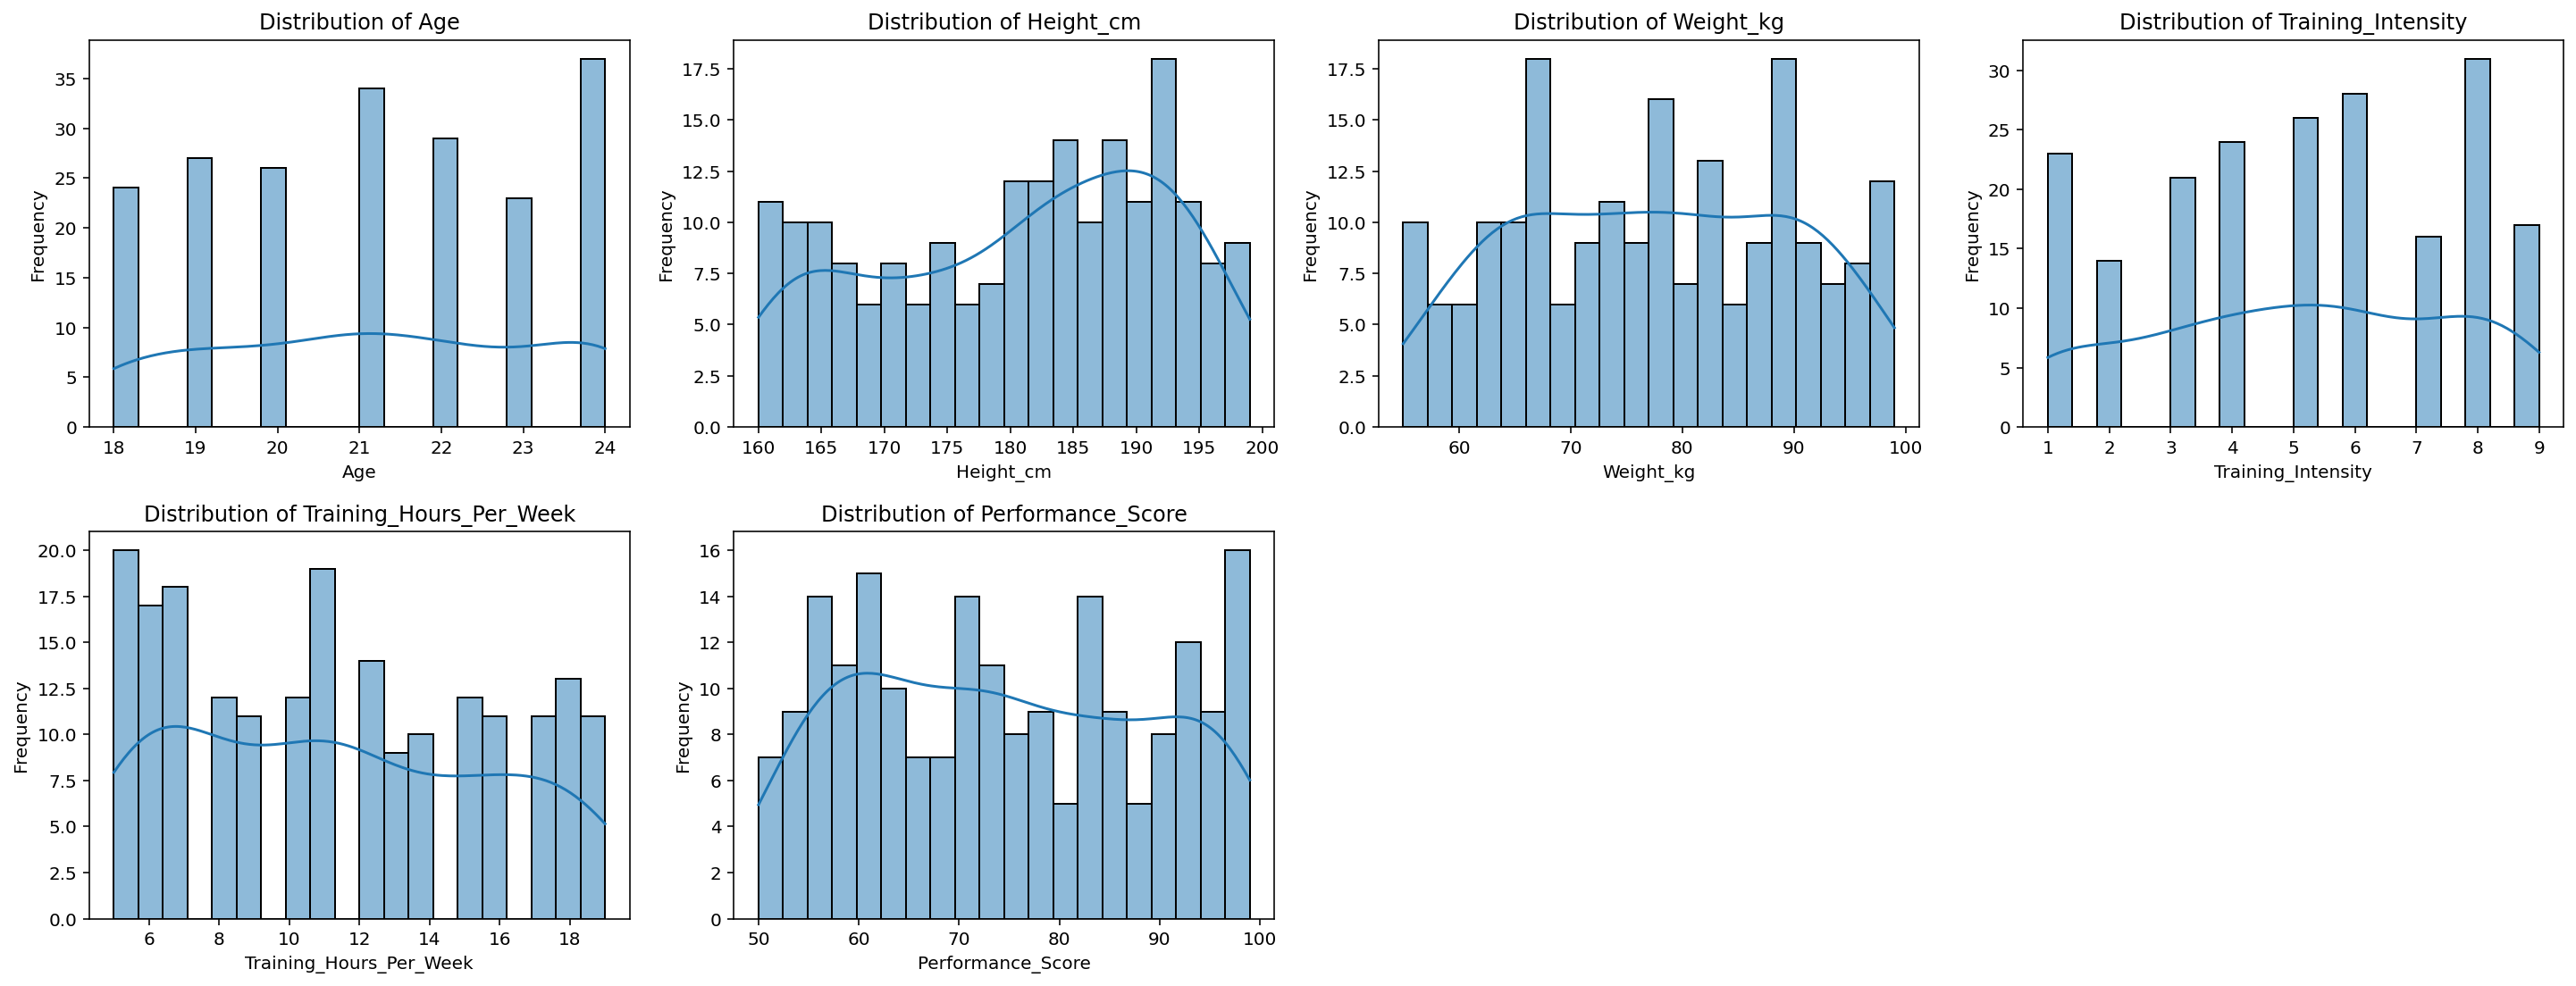

/tmp/ipython-input-84-3351395714.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Height_cm', y='Performance_Score', palette='deep')
/tmp/ipython-input-84-3351395714.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Weight_kg', y='Performance_Score', palette='deep')
/tmp/ipython-input-84-3351395714.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Training_Hours_Per_Week', y='Performance_Score', palette='deep')


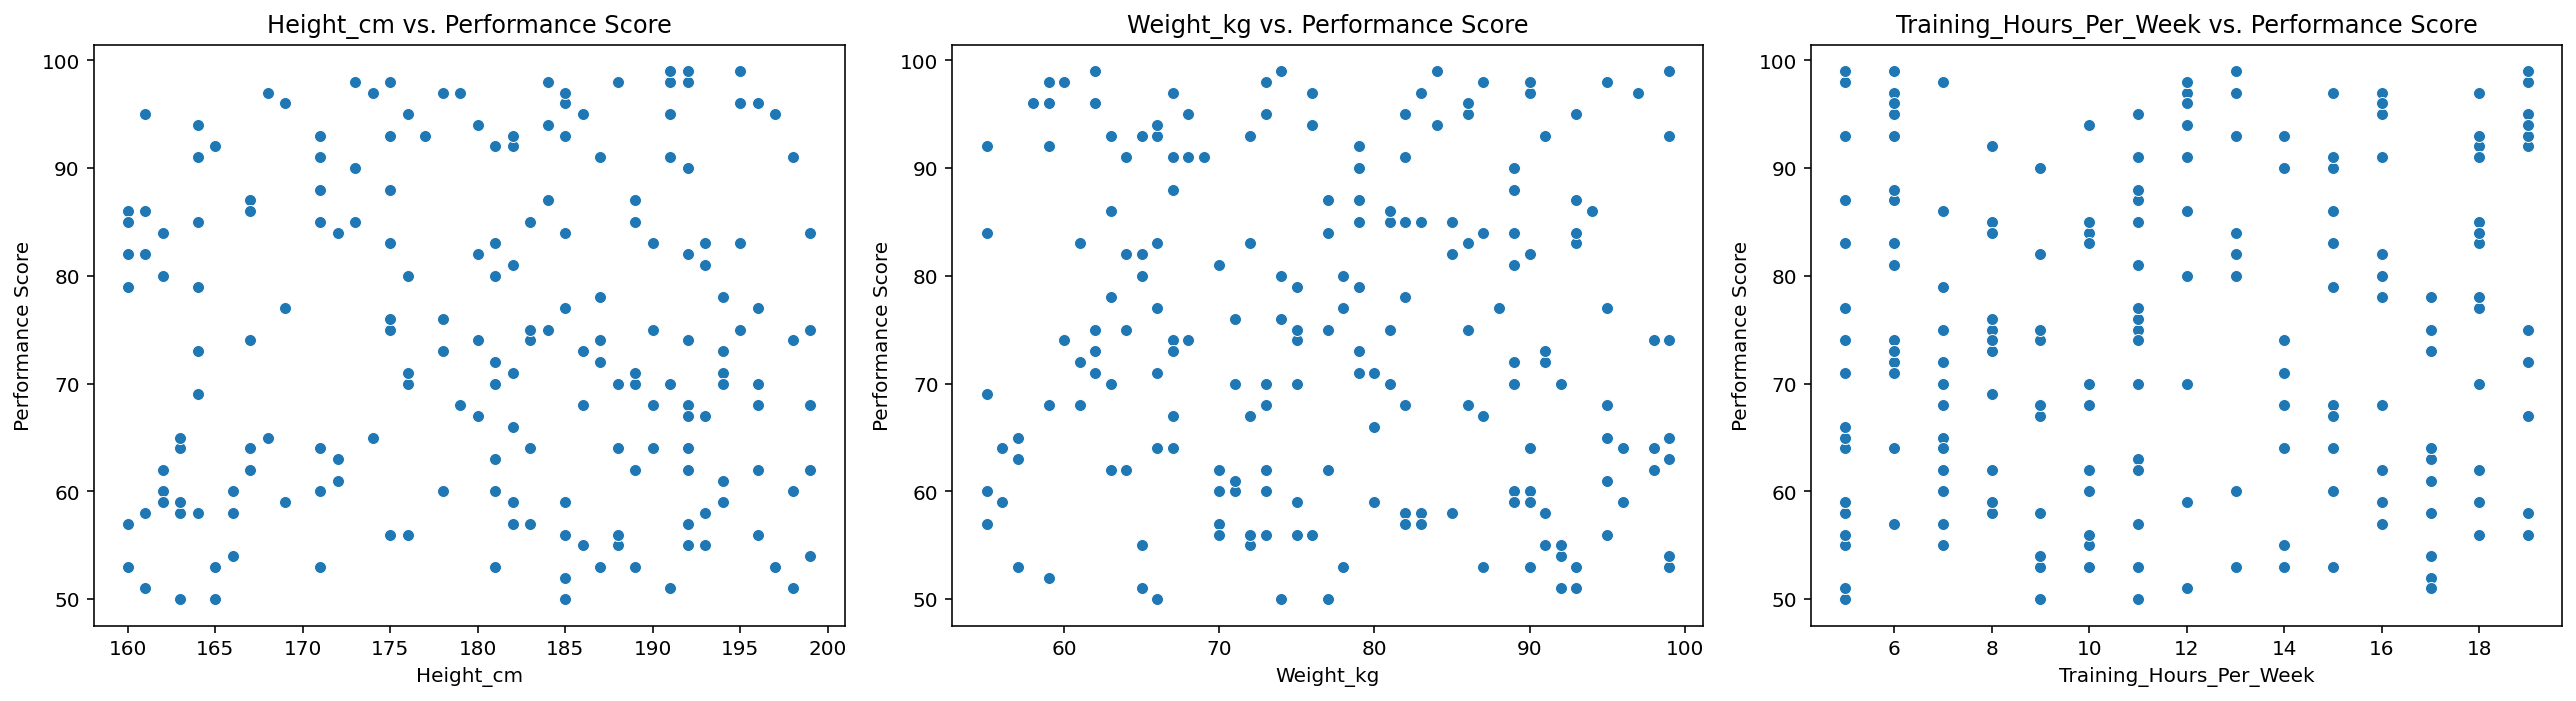

In [84]:
numerical_cols = [ "Age", "Height_cm", "Weight_kg", "Training_Intensity", "Training_Hours_Per_Week", "Performance_Score"
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Height_cm', y='Performance_Score', palette='deep')
plt.title('Height_cm vs. Performance Score')
plt.xlabel('Height_cm')
plt.ylabel('Performance Score')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Weight_kg', y='Performance_Score', palette='deep')
plt.title('Weight_kg vs. Performance Score')
plt.xlabel('Weight_kg')
plt.ylabel('Performance Score')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Training_Hours_Per_Week', y='Performance_Score', palette='deep')
plt.title('Training_Hours_Per_Week vs. Performance Score')
plt.xlabel('Training_Hours_Per_Week')
plt.ylabel('Performance Score')

plt.tight_layout()
plt.show()

### Correlation Matrix:

                              Age  ...  Performance_Score
Age                      1.000000  ...           0.007918
Height_cm               -0.015967  ...           0.012898
Weight_kg               -0.022215  ...          -0.084063
Training_Intensity       0.046616  ...          -0.130479
Training_Hours_Per_Week -0.082926  ...           0.077861
Performance_Score        0.007918  ...           1.000000

[6 rows x 6 columns]


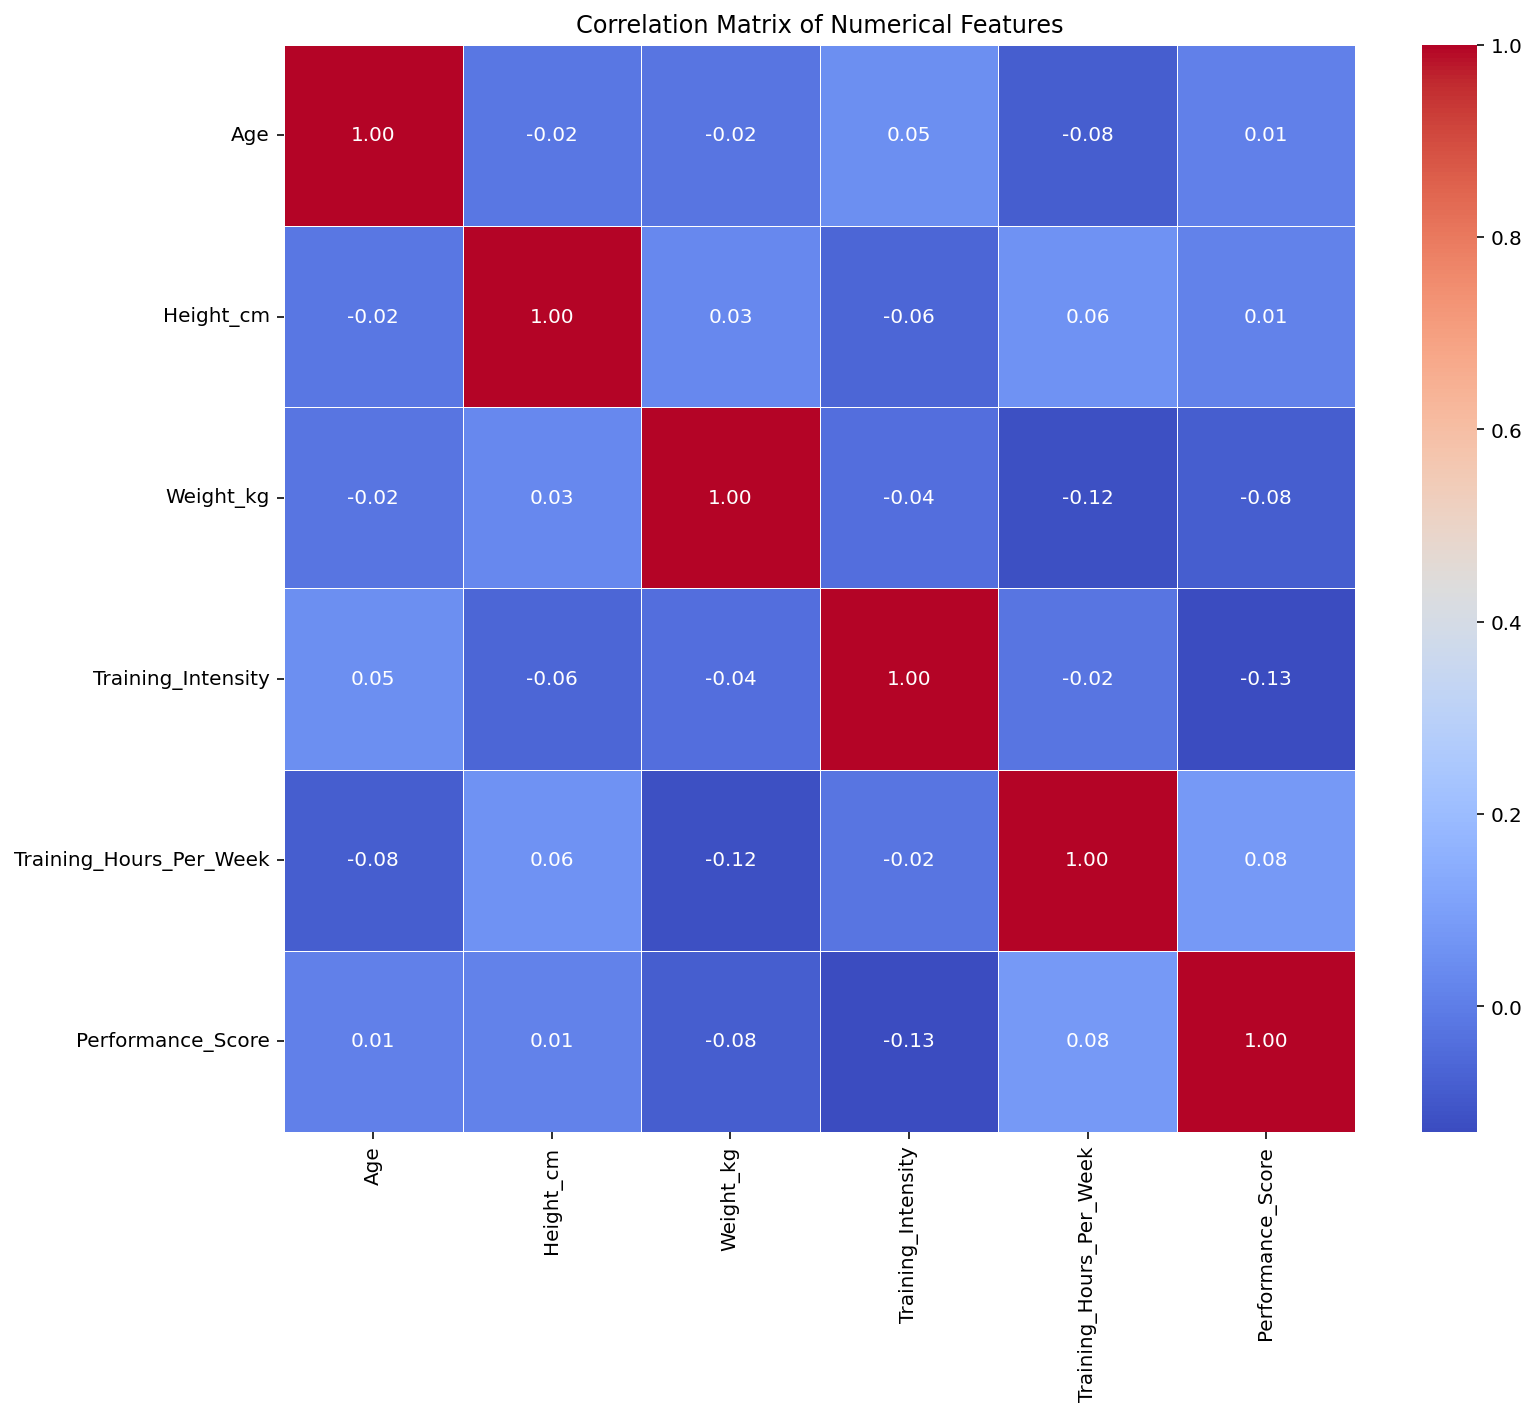

In [85]:

correlation_matrix = df[numerical_cols].corr()

print("### Correlation Matrix:\n")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Prepare Data for ML


In [86]:
df.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Position',
       'Training_Intensity', 'Training_Hours_Per_Week',
       'Recovery_Days_Per_Week', 'Match_Count_Per_Week',
       'Rest_Between_Events_Days', 'Fatigue_Score', 'Performance_Score',
       'Team_Contribution_Score', 'Load_Balance_Score', 'ACL_Risk_Score',
       'Injury_Indicator'],
      dtype='object')

In [87]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Apply one-hot encoding to the 'Position' column
df = pd.get_dummies(df, columns=['Position'], drop_first=True)

X = df.drop(columns=['Performance_Score'])

y = df['Performance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data preprocessing complete.
X_train shape: (160, 16)
X_test shape: (40, 16)
y_train shape: (160,)
y_test shape: (40,)


## Build and Evaluate Random Forest Model

In [88]:
rf_model = RandomForestRegressor(random_state=42)

print("Training Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Training Random Forest Regressor model...
Random Forest Regressor model trained.

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 10.95
Mean Squared Error (MSE): 194.15
R-squared (R2): -0.26


## Build and Evaluate Decision Tree Model


In [89]:
dt_model = DecisionTreeRegressor(random_state=42)

print("Training Decision Tree Regressor model...")
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")

Training Decision Tree Regressor model...
Decision Tree Regressor model trained.

Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 15.05
Mean Squared Error (MSE): 335.00
R-squared (R2): -1.17


## Build and Evaluate Linear Regression Model



In [90]:
lr_model = LinearRegression()

print("Training Linear Regression model...")
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Training Linear Regression model...
Linear Regression model trained.

Linear Regression Model Performance:
Mean Absolute Error (MAE): 11.76
Mean Squared Error (MSE): 206.83
R-squared (R2): -0.34


In [91]:
y_pred_rf_train = rf_model.predict(X_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)

y_pred_dt_train = dt_model.predict(X_train)
mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)

y_pred_lr_train = lr_model.predict(X_train)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)

print("\nTraining MSEs:")
print(f"Random Forest Regressor (Training MSE): {mse_rf_train:.2f}")
print(f"Decision Tree Regressor (Training MSE): {mse_dt_train:.2f}")
print(f"Linear Regression (Training MSE): {mse_lr_train:.2f}")


Training MSEs:
Random Forest Regressor (Training MSE): 32.96
Decision Tree Regressor (Training MSE): 0.00
Linear Regression (Training MSE): 202.02


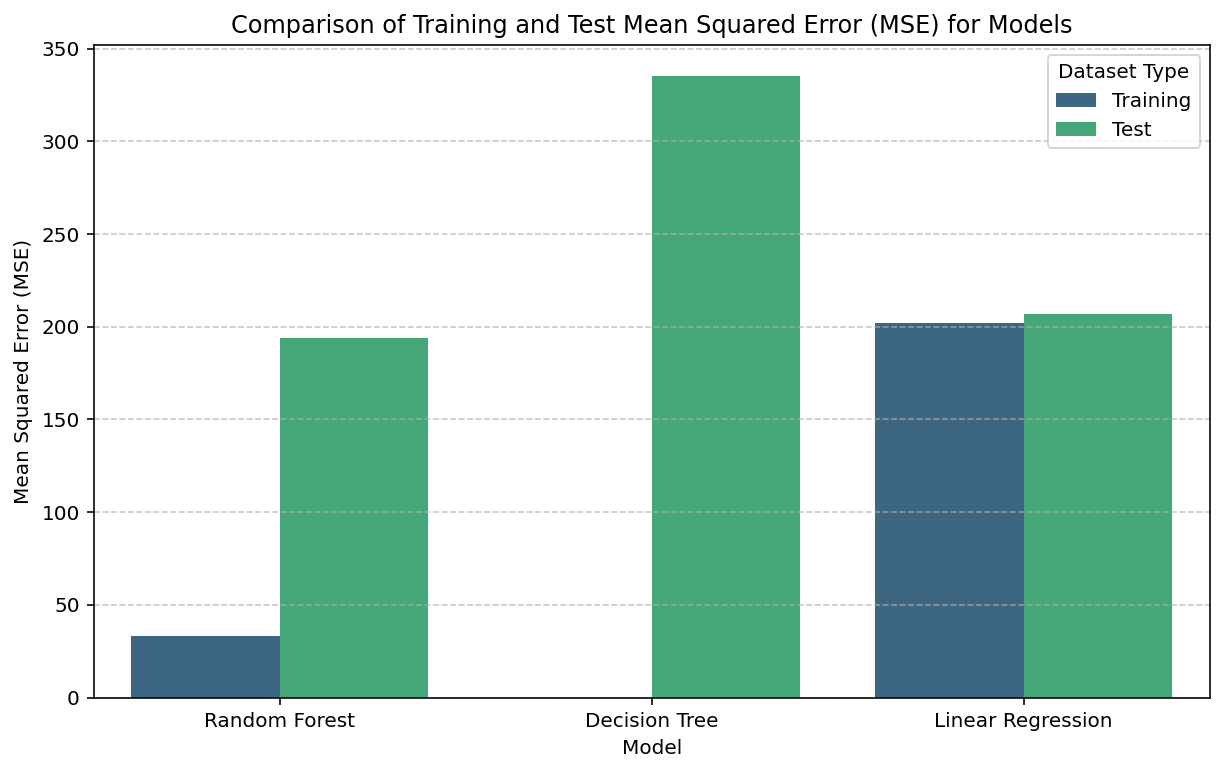

Bar chart comparing training and test MSEs generated.


In [92]:
mse_data = {
    'Model': ['Random Forest', 'Decision Tree', 'Linear Regression', 'Random Forest', 'Decision Tree', 'Linear Regression'],
    'Dataset': ['Training', 'Training', 'Training', 'Test', 'Test', 'Test'],
    'MSE': [mse_rf_train, mse_dt_train, mse_lr_train, mse_rf, mse_dt, mse_lr]
}
mse_df = pd.DataFrame(mse_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=mse_df, palette='viridis')
plt.title('Comparison of Training and Test Mean Squared Error (MSE) for Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Dataset Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Bar chart comparing training and test MSEs generated.")

In [93]:
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 10, replace=False)

X_test_sample = X_test.iloc[sample_indices]
y_test_sample = y_test.iloc[sample_indices]

y_pred_rf_sample = rf_model.predict(X_test_sample)
y_pred_dt_sample = dt_model.predict(X_test_sample)
y_pred_lr_sample = lr_model.predict(X_test_sample)

comparison_table = pd.DataFrame({
    'Actual_Performance_Score': y_test_sample.values,
    'RF_Predicted': y_pred_rf_sample,
    'DT_Predicted': y_pred_dt_sample,
    'LR_Predicted': y_pred_lr_sample
}, index=X_test_sample.index)

print("\nActual vs. Predicted Performance Scores for 10 Test Samples:")
display(comparison_table)

print("Comparison table of actual vs. predicted performance scores generated.")


Actual vs. Predicted Performance Scores for 10 Test Samples:


,Actual_Performance_Score,RF_Predicted,DT_Predicted,LR_Predicted
68,78,78.89,75.0,81.656610
56,59,75.22,55.0,70.032601
177,85,84.89,97.0,86.816277
84,95,75.07,97.0,68.027245
128,56,74.50,68.0,73.312316
165,76,70.88,58.0,68.026614
137,91,70.04,61.0,76.955918
67,77,78.57,74.0,76.135350
76,64,68.50,93.0,74.573089
69,75,72.27,69.0,73.843427


Comparison table of actual vs. predicted performance scores generated.


In [94]:
# Random Forest okazał się najskuteczniejszym modelem, osiągając najniższe błędy na danych testowych (MAE: 10,95; MSE: 194,15) oraz najlepiej odwzorowując trendy w wizualizacjach.

# Decision Tree wykazuje krytyczny overfitting (przetrenowanie) – mimo idealnego wyniku na danych treningowych (MSE: 0,00), zanotował najgorsze wyniki testowe i wysoką wariancję na wykresach.

# Regresja Liniowa jest najbardziej stabilna i najmniej podatna na overfitting, ale jej słabsze wyniki (MAE: 11,76) sugerują, że nie radzi sobie z nieliniowymi zależnościami w danych.

# Ujemne wartości R-squared dla wszystkich modeli wskazują, że żadne z rozwiązań nie dopasowało się dobrze do tego konkretnego zbioru testowego, działając gorzej niż prosta średnia.

# Rekomendacja: Należy postawić na Random Forest, poddając go dalszemu tuningowi hiperparametrów, aby zredukować zauważony overfitting i poprawić ogólną precyzję.